In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

from pandas.plotting import scatter_matrix
import math

# Get the Data

In [116]:
maneuvers = pd.read_csv("maneuvers.csv")
#maneuvers.head()

In [117]:
maneuvers.describe()

,t,x,y,z,dx,dy,dz,dv_st
count,1230.000000,1.230000e+03,1.230000e+03,1.230000e+03,1.230000e+03,1.230000e+03,1.230000e+03,1.230000e+03
mean,1889.072429,-9.916647e-01,4.966089e-08,8.983599e-04,1.013617e-08,9.931018e-03,-2.791437e-08,1.678578e-11
std,1086.682334,6.347890e-10,4.377754e-08,3.185244e-09,8.940185e-09,2.167380e-09,2.451461e-08,8.777943e-13
min,9.177680,-9.916647e-01,-8.264015e-11,8.983543e-04,-1.957939e-11,9.931014e-03,-8.232560e-08,1.418637e-11
25%,949.125054,-9.916647e-01,9.850175e-09,8.983570e-04,2.009559e-09,9.931016e-03,-4.677537e-08,1.620357e-11
50%,1889.072429,-9.916647e-01,3.771331e-08,8.983599e-04,7.699809e-09,9.931018e-03,-2.129590e-08,1.676455e-11
75%,2829.019804,-9.916647e-01,8.355092e-08,8.983626e-04,1.705206e-08,9.931020e-03,-5.693426e-09,1.734733e-11
max,3768.967179,-9.916647e-01,1.468071e-07,8.983653e-04,2.997673e-08,9.931022e-03,-5.776291e-12,2.054861e-11


Notice that dv_vel varies in the range -2e-7 to 1e-7, while dv_st varies in the range -7e-9 to 4e-9, so the MOST COSTLY maneuvers are much larger using CORRECTION_VEL method than using CORRECTION_ST !!

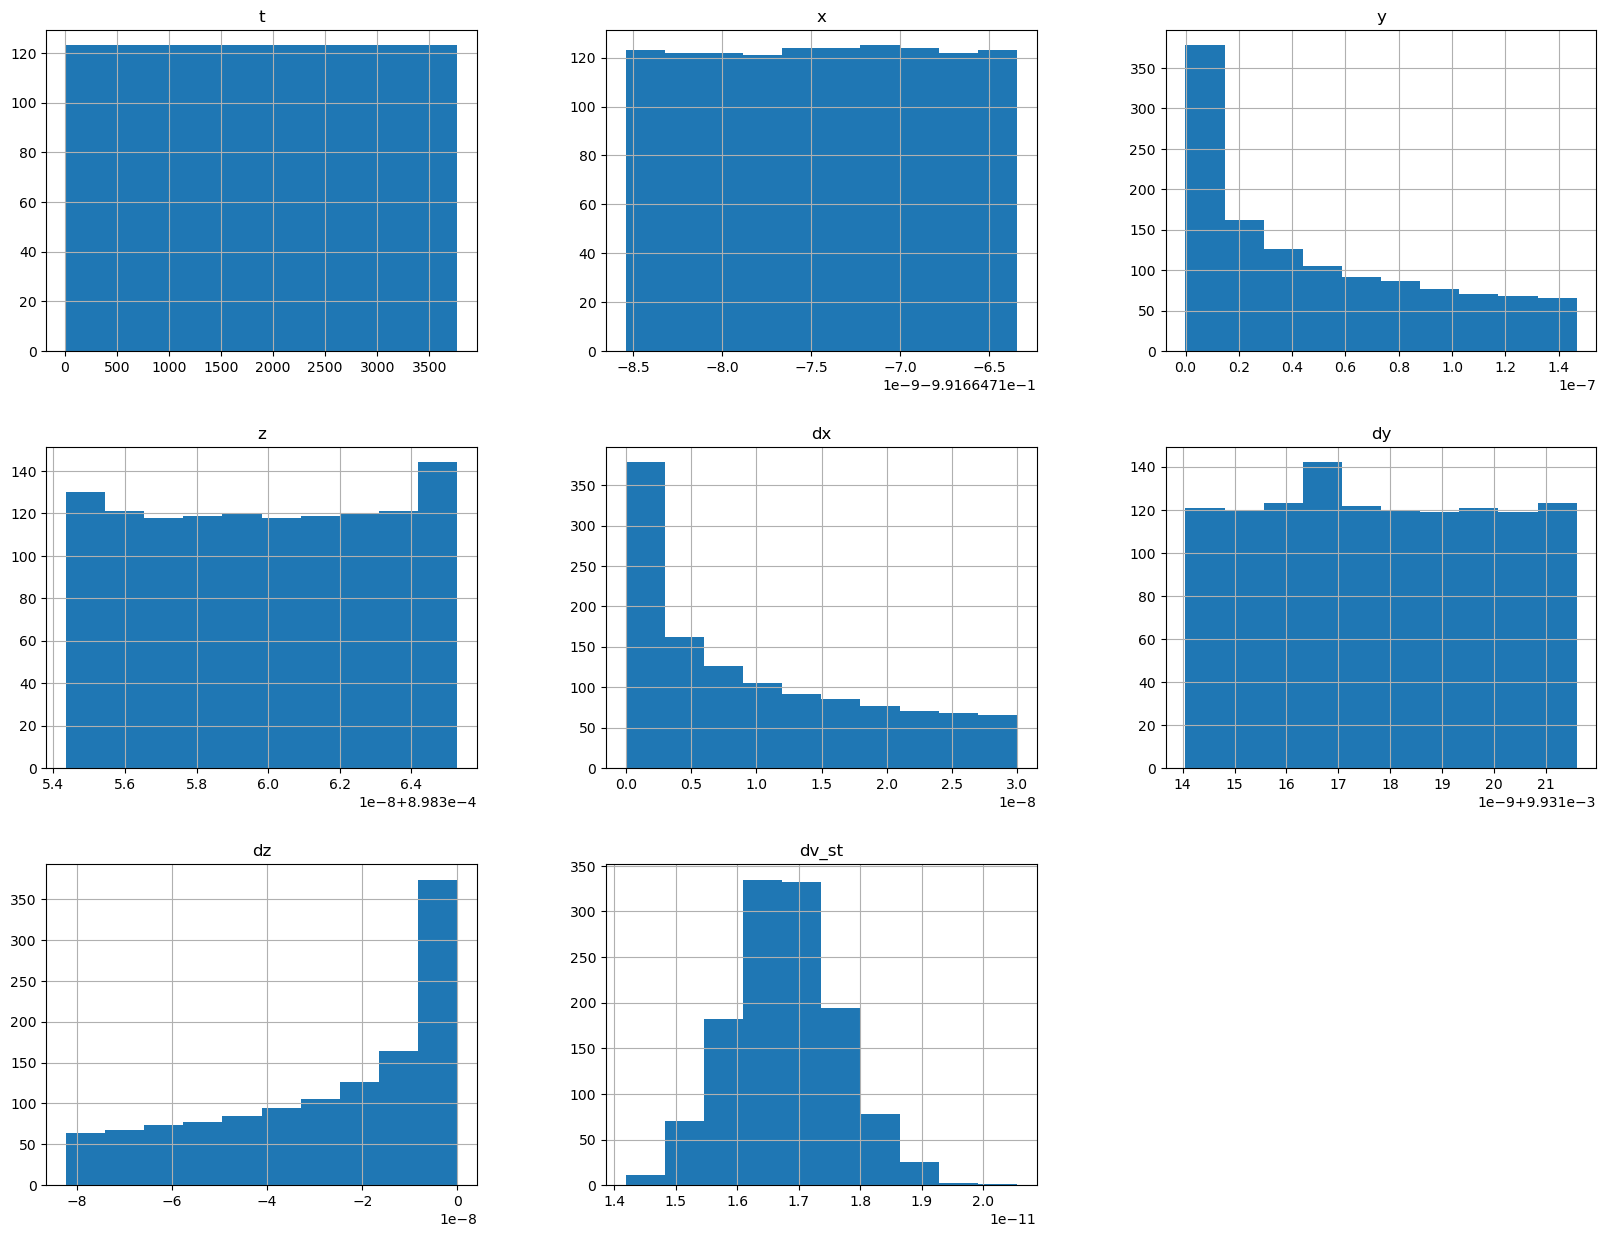

In [118]:
maneuvers.hist(figsize=(20,15))
plt.show()

Histograms of attributes (x,y,z,dx,dy,dz) are tail heavy. We may need to transform to polar coords, or use angle in p.o. as extra attribute.

## Visualizing Data

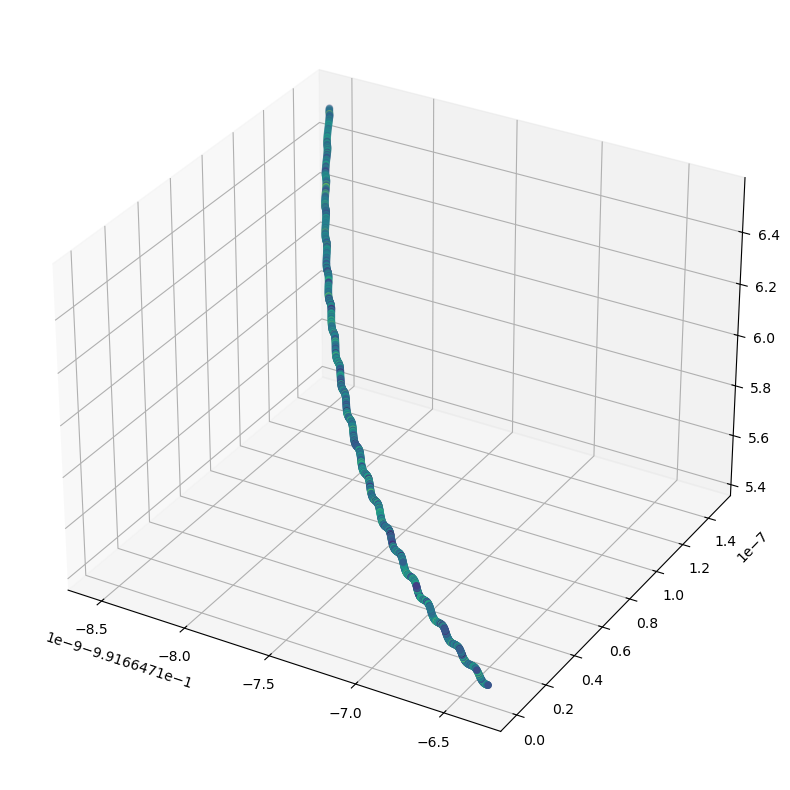

In [119]:
# Visualize shadowing orbit in position space, i.e. the points where correction
# maneuvers are performed.

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(maneuvers['x'], maneuvers['y'], maneuvers['z'], c=maneuvers['dv_st'])
plt.show()

Try adding new attribute "angle" = angle in the periodic orbit, which is essentially time/period.

In [120]:
#maneuvers["angle"]=maneuvers["t"].apply(lambda x: math.fmod(x, 0.3059226605957322E+01))
maneuvers = maneuvers.drop(["t"], axis=1)
corr_matrix = maneuvers.corr()
corr_matrix["dv_st"].sort_values(ascending=False)

dv_st    1.000000
y        0.010943
dx       0.010891
dy       0.009432
z        0.007983
x       -0.009071
dz      -0.011022
Name: dv_st, dtype: float64

array([[<Axes: xlabel='x', ylabel='x'>, <Axes: xlabel='dx', ylabel='x'>,
        <Axes: xlabel='dv_st', ylabel='x'>],
       [<Axes: xlabel='x', ylabel='dx'>,
        <Axes: xlabel='dx', ylabel='dx'>,
        <Axes: xlabel='dv_st', ylabel='dx'>],
       [<Axes: xlabel='x', ylabel='dv_st'>,
        <Axes: xlabel='dx', ylabel='dv_st'>,
        <Axes: xlabel='dv_st', ylabel='dv_st'>]], dtype=object)

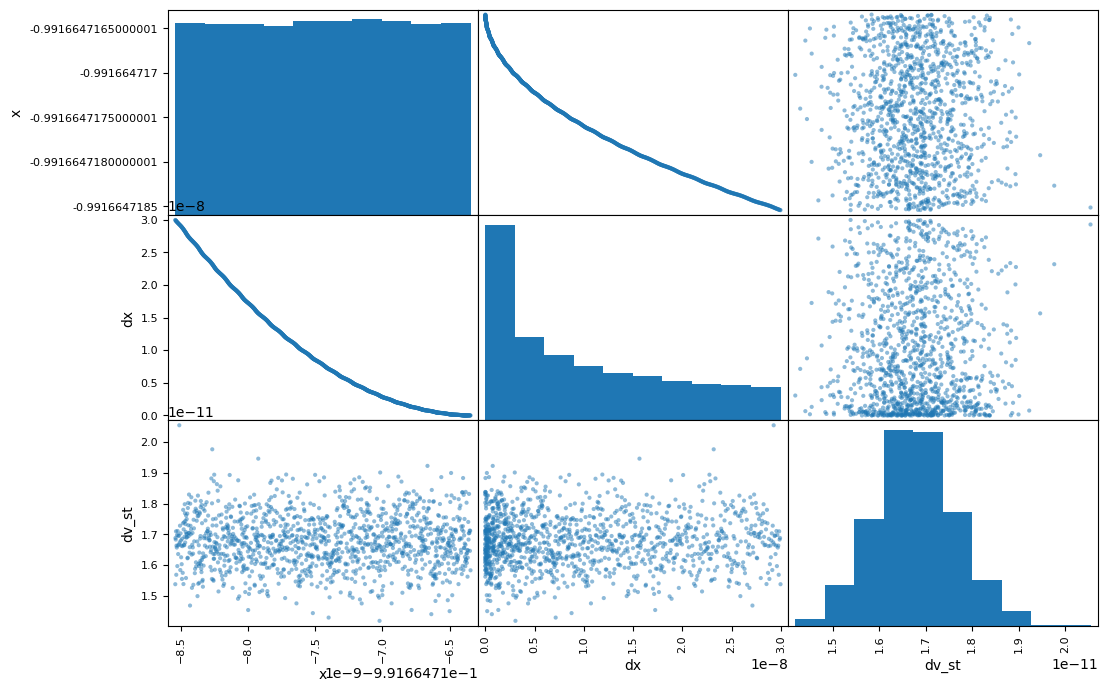

In [121]:
#attributes = ["angle", "x", "dx", "dv_st"]
attributes = ["x", "dx", "dv_st"]
scatter_matrix(maneuvers[attributes], figsize=(12, 8))

dv_st is either positively or negatively correlated to state variables (x,y,z,dx,dy,dz) !!

Notice that angle and dv_st are not correlated, but they are nonlinearly related ("V" shape) !!

# Prepare the Data for Machine Learning Algorithms

## Create a Train/Test Set

In [122]:
# Let's separate the predictors and the labels
maneuvers_predictors = maneuvers.drop("dv_st", axis=1)
maneuvers_labels = maneuvers[["dv_st"]].copy()
maneuvers_predictors.head()
#maneuvers_labels.head()

,x,y,z,dx,dy,dz
0,-0.991665,6.991149e-12,0.000898,-8.695164e-12,0.009931,-5.776291e-12
1,-0.991665,7.582888e-12,0.000898,-9.260348e-12,0.009931,-8.976603e-12
2,-0.991665,6.975162e-12,0.000898,-8.756346e-12,0.009931,-1.269843e-11
3,-0.991665,5.375805e-12,0.000898,-9.247733e-12,0.009931,-1.694721e-11
4,-0.991665,2.762325e-12,0.000898,-9.419354e-12,0.009931,-2.170409e-11


In [123]:
## Create Train/Test/Validation Sets

In [124]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
maneuvers_predictors, maneuvers_labels, test_size=0.2, random_state=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)
X_train.head()

(738, 6)
(246, 6)
(246, 6)


,x,y,z,dx,dy,dz
511,-0.991665,2.651551e-08,0.000898,5.404753e-09,0.009931,-1.487168e-08
788,-0.991665,6.129171e-08,0.000898,1.251345e-08,0.009931,-3.449312e-08
402,-0.991665,1.676814e-08,0.000898,3.412222e-09,0.009931,-9.371978e-09
932,-0.991665,8.533729e-08,0.000898,1.741781e-08,0.009931,-4.781162e-08
835,-0.991665,6.859220e-08,0.000898,1.400812e-08,0.009931,-3.863684e-08


In [125]:
# Scale all the features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)
X_train_scaled[:5]

array([[0.58579665, 0.18107556, 0.42728502, 0.18079227, 0.40632513,
        0.81941281],
       [0.36141217, 0.41782586, 0.65455988, 0.41778984, 0.62889428,
        0.58105665],
       [0.67374444, 0.11471717, 0.331325  , 0.11436305, 0.32322027,
        0.88622179],
       [0.24195522, 0.58152405, 0.75860938, 0.581297  , 0.75784941,
        0.41926699],
       [0.32123601, 0.46752635, 0.68435673, 0.46762083, 0.67551156,
        0.53071974]])

In [126]:
# Scale target variable dv_st as well.
# Rationale: dv_st takes very small values (10^{-8}), 
# so MSE may be tiny and not computed properly. Also, NN may converge faster?

scaler_target = MinMaxScaler()
y_train_scaled = scaler_target.fit_transform(y_train)
y_valid_scaled = scaler_target.transform(y_valid)
y_test_scaled = scaler_target.transform(y_test)

In [127]:
import joblib
joblib.dump(scaler, 'scaler_supervised.gz')
joblib.dump(scaler_target, 'scaler_target_supervised.gz')

['scaler_target_supervised.gz']

# Select and Train a Model

## Training and Evaluating on the Training Set

In [128]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [129]:
# Let's measure this regression model's RMSE on the whole training set
from sklearn.metrics import mean_squared_error
maneuvers_predictions = lin_reg.predict(X_train_scaled)
lin_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.00010840103005514646

Clearly not a great score: the SD(dv_st) value is 8.e-7, so a typical prediction error of 6.6.e-7 is not great.

In [130]:
# Let’s train a DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train_scaled, y_train_scaled)

maneuvers_predictions = tree_reg.predict(X_train_scaled)
tree_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

NOW THIS IS MUCH BETTER!!

In [131]:
#Let's try it out on 5 instances from the test set
some_data = X_test_scaled[10:20]
some_labels = y_test_scaled[10:20]
print("Predictions:", list(tree_reg.predict(some_data)))
print("Labels:", list(some_labels))

Predictions: [0.38648007729016154, 0.3477471674912911, 0.7266153350704103, 0.5761044588224968, 0.7349591591767437, 0.39725385718886397, 0.34203823520801135, 0.4740755921187465, 0.22548818690165984, 0.36185847703252705]
Labels: [array([0.38867582]), array([0.71191849]), array([0.43791902]), array([0.37553064]), array([0.2912141]), array([0.46435577]), array([0.2103522]), array([0.36390784]), array([0.3933308]), array([0.29712797])]


In [132]:
# Let’s train a RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_scaled, y_train_scaled)

maneuvers_predictions = forest_reg.predict(X_train_scaled)
forest_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

/home/pablo/anaconda3/envs/halo/lib/python3.12/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.0605931733607691

## Polynomial Regression

In [133]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
maneuvers_pred_poly = poly_features.fit_transform(X_train_scaled)
#print(X_train_scaled.head())
#print(maneuvers_pred_poly[0])

In [134]:
my_lin_reg = LinearRegression()
my_lin_reg.fit(maneuvers_pred_poly, y_train_scaled)
maneuvers_predictions = my_lin_reg.predict(maneuvers_pred_poly)
lin_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

6.943334293473707e-05

## SVM Regression

In [135]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2)
svm_poly_reg.fit(X_train_scaled, y_train_scaled)
maneuvers_predictions = svm_poly_reg.predict(X_train_scaled)
svm_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

/home/pablo/anaconda3/envs/halo/lib/python3.12/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.14013820621780607

## Cross-validation

Scikit-Learn’s K-fold cross-validation feature. The following code randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Random Forest model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores.

In [136]:
from sklearn.model_selection import cross_val_score
#tree_reg = DecisionTreeRegressor()
#forest_reg = RandomForestRegressor()
lin_reg = LinearRegression()
scores = cross_val_score(lin_reg, maneuvers_pred_poly, y_train_scaled,
scoring="neg_root_mean_squared_error", cv=5)
poly_rmse_scores = -scores

In [137]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(poly_rmse_scores)

Scores: [7.19084876e-05 7.28464644e-05 7.38873819e-05 7.01215280e-05
 7.36531098e-05]
Mean: 7.248339433710343e-05
Standard deviation: 1.3696835628357647e-06


## Evaluate Model on Test Set

In [138]:
maneuvers_pred_poly = poly_features.fit_transform(X_test_scaled)
maneuvers_predictions = my_lin_reg.predict(maneuvers_pred_poly)
lin_mse = mean_squared_error(y_test_scaled, maneuvers_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

7.529367331813516e-05

## Persist model

In [139]:
# Persist the model for future use (see correction_module.py) without having to retrain.
# Here you can replace pickle with joblib or cloudpickle
from pickle import dump
with open("model_supervised.pkl", "wb") as f:
    dump(my_lin_reg, f, protocol=5)